<a href="https://colab.research.google.com/github/dangtrantrung/BUILD-LOAN-REPAYMENT-PREDICTION-MODEL/blob/master/BUILD_LOAN_REPAYMENT_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# LOAD DATA
# Mount Drive to load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

In [5]:
# Install extra lib
!pip install xgboost
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [19]:
# Read CSV file
df_loan = pd.read_csv('/content/drive/MyDrive/LOAN REPAYMENT/loan_data.csv')
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37066 entries, 0 to 37065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      37066 non-null  int64  
 1   purpose            37066 non-null  object 
 2   int_rate           37066 non-null  float64
 3   installment        37066 non-null  float64
 4   log_annual_inc     37066 non-null  float64
 5   dti                36966 non-null  float64
 6   fico               37066 non-null  int64  
 7   days_with_cr_line  37066 non-null  int64  
 8   revol_bal          37066 non-null  int64  
 9   revol_util         37054 non-null  float64
 10  inq_last_6mths     37066 non-null  int64  
 11  delinq_2yrs        37032 non-null  float64
 12  pub_rec            37066 non-null  int64  
 13  not_fully_paid     37066 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 4.0+ MB


In [20]:
df_loan.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


In [22]:
#EDA
# Kiểm tra số lượng bản ghi -> 37K bản ghi
df_loan.count()


credit_policy        37066
purpose              37066
int_rate             37066
installment          37066
log_annual_inc       37066
dti                  36966
fico                 37066
days_with_cr_line    37066
revol_bal            37066
revol_util           37054
inq_last_6mths       37066
delinq_2yrs          37032
pub_rec              37066
not_fully_paid       37066
dtype: int64

In [23]:
# Check for nan record. Only 146 record -> dropna
df_loan[df_loan.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
251,1,credit_card,0.143,1201.33,0.0,NaN,679,42156,16858,0.371,1,0.000,2,1
1554,1,credit_card,0.088,826.66,0.0,NaN,709,38353,47472,0.682,1,0.000,0,0
1805,1,debt_consolidation,0.124,167.03,38000.0,5.56,689,39052,0,NaN,0,0.000,0,0
2226,1,home_improvement,0.082,814.70,120000.0,9.25,764,37987,0,NaN,0,0.000,0,0
2345,1,debt_consolidation,0.131,797.80,0.0,NaN,814,37316,97,0.016,0,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35967,1,house,0.082,1256.97,0.0,NaN,709,31686,0,0.000,278568,0.544,0,1
35969,1,home_improvement,0.139,928.66,1.0,NaN,709,33848,0,0.000,1648,0.323,0,1
36356,1,debt_consolidation,0.250,59.64,60000.0,9.40,719,39234,0,0.000,0,NaN,0,1
36503,1,credit_card,0.065,1225.24,0.0,NaN,739,30864,0,0.000,55481,0.937,0,1


In [24]:
# Drop all Nan rows
df_loan.dropna(inplace=True)

In [25]:
# Check for nan record. Only 146 record -> no record
df_loan[df_loan.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid


1    26775
0    10145
Name: not_fully_paid, dtype: int64


<Axes: >

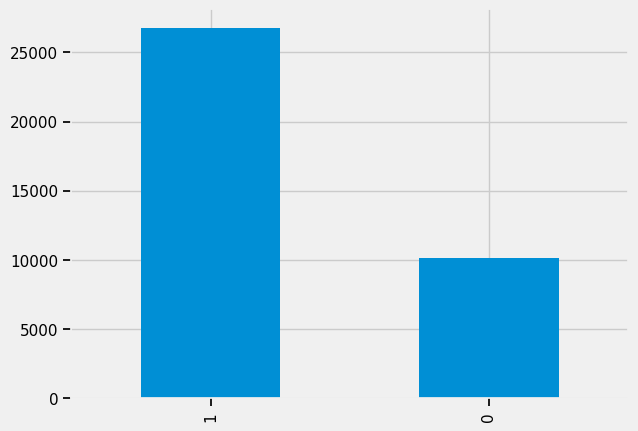

In [26]:
# Thống kê khoản vay có hoàn trả hay không.
  # 0: khoản vay không được hoàn trả dầy đủ
  # 1: khoản vay được hoàn trả đày đủ

print(df_loan["not_fully_paid"].value_counts())
df_loan["not_fully_paid"].value_counts().plot(kind="bar")

# Dữ liệu imbalance nặng -> cần xử lý -> sẽ xử lý sau trước khi train

Pre Processing Data

In [27]:
# Tìm các field là Object/ String -> chỉ có cột Purpose -> Xử lý cột này bằng OneHot
object_cols = [f for f in df_loan.columns if df_loan[f].dtype =="O"]
print(object_cols)

['purpose']


In [28]:
# Tìm hiểu qua về cột này
df_loan['purpose'].value_counts()

# Dễ thấy đa số là debt_consolidation -> Có 2 cách
# - Để nguyên và thực hiện onehot
# - Gom lại debt_cosolidation và Others
# -> Mình sẽ thử cách 2


debt_consolidation    19516
credit_card            9087
home_improvement       2836
other                  2496
major_purchase          899
medical                 465
house                   406
car                     384
vacation                313
small_business          269
moving                  234
renewable_energy         15
Name: purpose, dtype: int64

In [29]:
def process_purpose(x):
  if x == "debt_consolidation":
    return 1
  else:
    return 0

df_loan['purpose_int'] = df_loan['purpose'].apply(process_purpose)

In [30]:
df_loan['purpose_int'].value_counts() # -> chỉ còn 2 giá trị

1    19516
0    17404
Name: purpose_int, dtype: int64

In [31]:
# Drop purpose và view lại
df_loan.drop(columns=["purpose"], inplace=True)
df_loan

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,1,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,0
1,1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,0
2,1,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,0
3,1,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,0
4,1,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,1
37062,1,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,1
37063,1,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,0
37064,1,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,1
